In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/exoplanet_data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Module 4 Challenge: Exoplanets with Pandas

Before loading it into Python, open up the file named `exoplanet_data.csv` and take a quick look at its contents. The file starts with many lines of comments. In particular, there are descriptions of each of the columns included in the file. Most of them are somewhat clear, but there are two that aren't which you should ignore when doing the problem, which I will describe briefly.
*    `loc_rowid`: The table in the file doesn't actually correspond to the whole database, so the values in this column tell you the original row indices in the full dataset.
*    `default_flag`: For each planet, there can be more than one "solution" for the set of observations. This flag indicates whether the row is the "default" solution. I chose only the subset of rows where this value is 1, corresponding to the default solutions. 

One important thing to mention is that I downloaded a version of this data excluding the error bars. In reality, all these measurements come with some amount of uncertainty.

Now, open the file using `pd.read_csv`.
*   The file is already comma-separated, so no need to pass a separator
*   You can use either `header=0` or pass your own list of names if you don't like the ones in the file.
*   You can optionally exclude the two columns I mentioned above with `usecols` but it's probably more trouble than it's worth.
*   You want to ignore the lines of comments, so make sure to use `comment='#'`.

In [2]:
df = pd.read_csv('data/exoplanet_data.csv', comment='#')

Your main tasks:
1.   For starters, how many rows does the DataFrame contain? This translates to the total number of confirmed exoplanets.
2.   How many different exoplanet detection methods are there? You can get the unique values of a column by using the method `df['Columnname'].unique()`.
3.   Make a cumulative histogram showing how the number of known exoplanets has grown over time. Make a second version where you break this down by detection method. Do you notice any years with very drastic increases?


In [3]:
print(f'The dataframe contains {len(df.index)} rows')
print(f'There are {len(df.discoverymethod.unique())} unique detection methods')

The dataframe contains 5030 rows
There are 11 unique detection methods


Text(0.5, 0, 'Discovery Year')

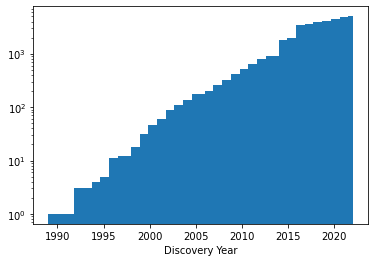

In [4]:
plt.hist(df.disc_year, cumulative=True, bins=int(np.sqrt(len(df.index))))
plt.yscale('log')
plt.xlabel('Discovery Year')

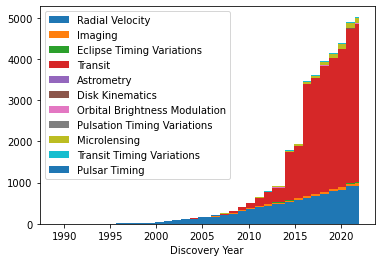

In [7]:
df_list = []
for method in df.discoverymethod.unique():
    df_list.append(df[df.discoverymethod==method].disc_year.values)
_,_,_ = plt.hist(df_list, stacked=True, bins=int(np.sqrt(len(df.index))),label=df.discoverymethod.unique(),cumulative=True)
plt.xlabel('Discovery Year')
plt.legend()


Now, some more interesting tasks. Keep in mind that some of the conclusions you draw here might not be true. Observations are prone to some level of bias, also known as "selection effects". For example, it's very hard to directly image exoplanets that are small and close to their host star, so the method of direct imaging is biased towards larger exoplanets and larger distances. Each detection method is biased in some way, so take some of your conclusions with a grain of salt.

Make some histograms of some of the physical values, including exoplanet radius, semimajor axis, host star mass, etc. For your histogram of the exoplanet mass, restrict yourself to the rows where `bl_pmassprov=='Mass'` instead of `Msini`. Do you notice anything interesting? For example, you should find that most host stars will have masses around 1 solar mass. This is because most exoplanet surveys have purposefully targeted stars similar to our own Sun. Other things to look into: Are there more planets further away than close to us? Does planetary radius or mass seem to peak at any specific values?

Make two scatter plots. In one, compare the planet radius to the orbital period. In the other, compare the planet mass to the orbital period. Color the points according to the method with which they were detected. Finally, add and label the points which correspond to the masses, orbital periods, and radii of the Solar System planets for comparison. 

Do you notice the points clustering around any specific values? Does this align with what you know about the different detection methods?

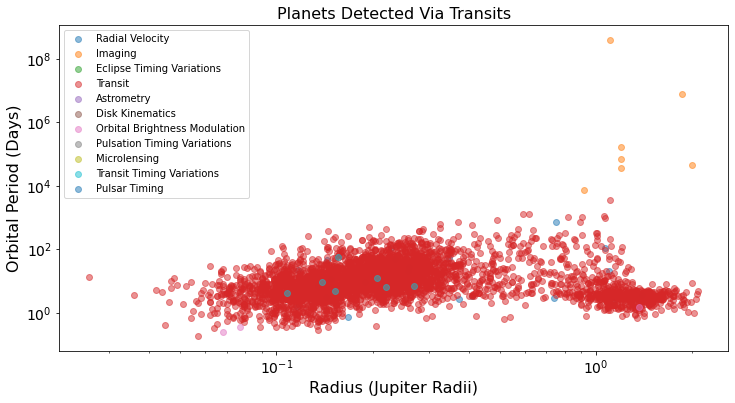

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
for method in df.discoverymethod.unique():
    plt.scatter(df[df.discoverymethod==method].pl_radj, df[df.discoverymethod==method].pl_orbper, alpha=0.5,label=method)
plt.xlabel('Radius (Jupiter Radii)', fontsize=16)
plt.ylabel('Orbital Period (Days)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.title('Planets Detected Via Transits', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

Make a histogram of planetary multiplicity. That is, for each host star, how many planets are there? Keep in mind that you'll need to avoid double counting, as each host star with multiple planets is represented multiple times. You can accomplish this by using the method

```
df.groupby("A").first()
```

Run it yourself and print out the resulting dataframe first to see what this is doing.

How many systems have 8 planets like us? Do you think your result is true or a result of selection effects?

In [13]:
grouped_df = df.groupby("hostname").first()

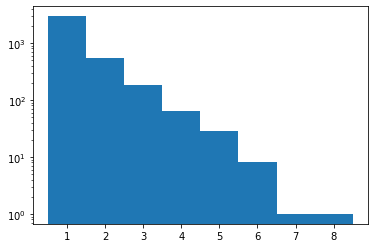

In [20]:
bins = np.arange(1, max(grouped_df.sy_pnum.values) + 1.5) - 0.5
plt.hist(grouped_df.sy_pnum, bins=bins)
plt.yscale('log')

If you can think of anything else, have at it!